In [15]:
from __future__ import print_function, division
import sys
import argparse
from qepy import *
from schedulerpy import *
from math import sqrt  
import matplotlib.pyplot as plt    

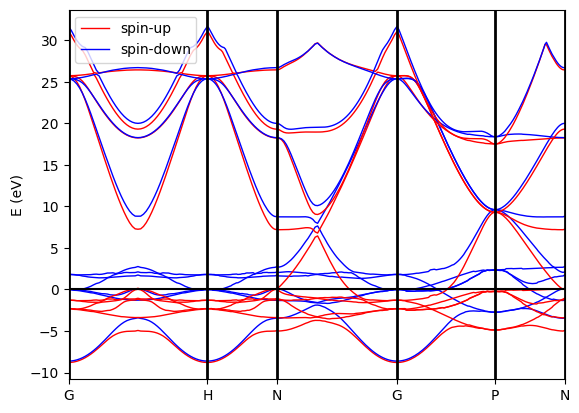

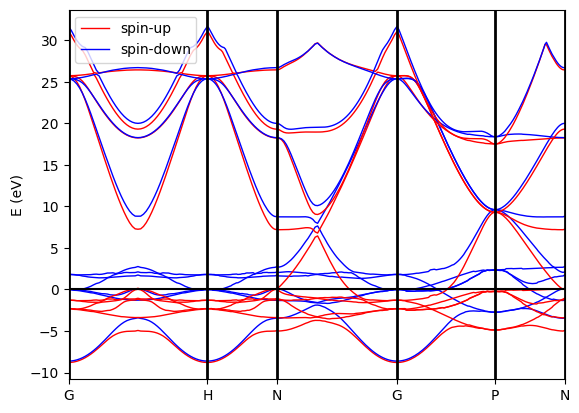

In [16]:
# k-points map
npoints = 50
p = Path([ [[0.0, 0.0, 0.0 ],'G'],
                      [[0.0, 0.0, 1.0 ],'H'],
                      [[1./2,0.0,1./2.],'N'],
                      [[0.0, 0.0, 0.0 ],'G'],
                      [[1./2, 1./2, 1./2 ],'P'],
                      [[1./2,0.0,1./2. ],'N']], [npoints,npoints,npoints,npoints,npoints])

# Class PwXML. QE database reading
# the code tries to read the data-file-schema.xml in path/prefix.save
xml_obj = PwXML(prefix='pw',path='./databases_qepy/iron-metal/bands/t0/')

# Class PwXML. QE database reading
xml_obj.plot_eigen(p)

In [17]:
p.get_indexes()

[[0, 'G'], [50, 'H'], [100, 'N'], [150, 'G'], [200, 'P'], [250, 'N']]

We can play with the PwXML object to plot the band structure from the eigenergies along a path. Below I provide an example script

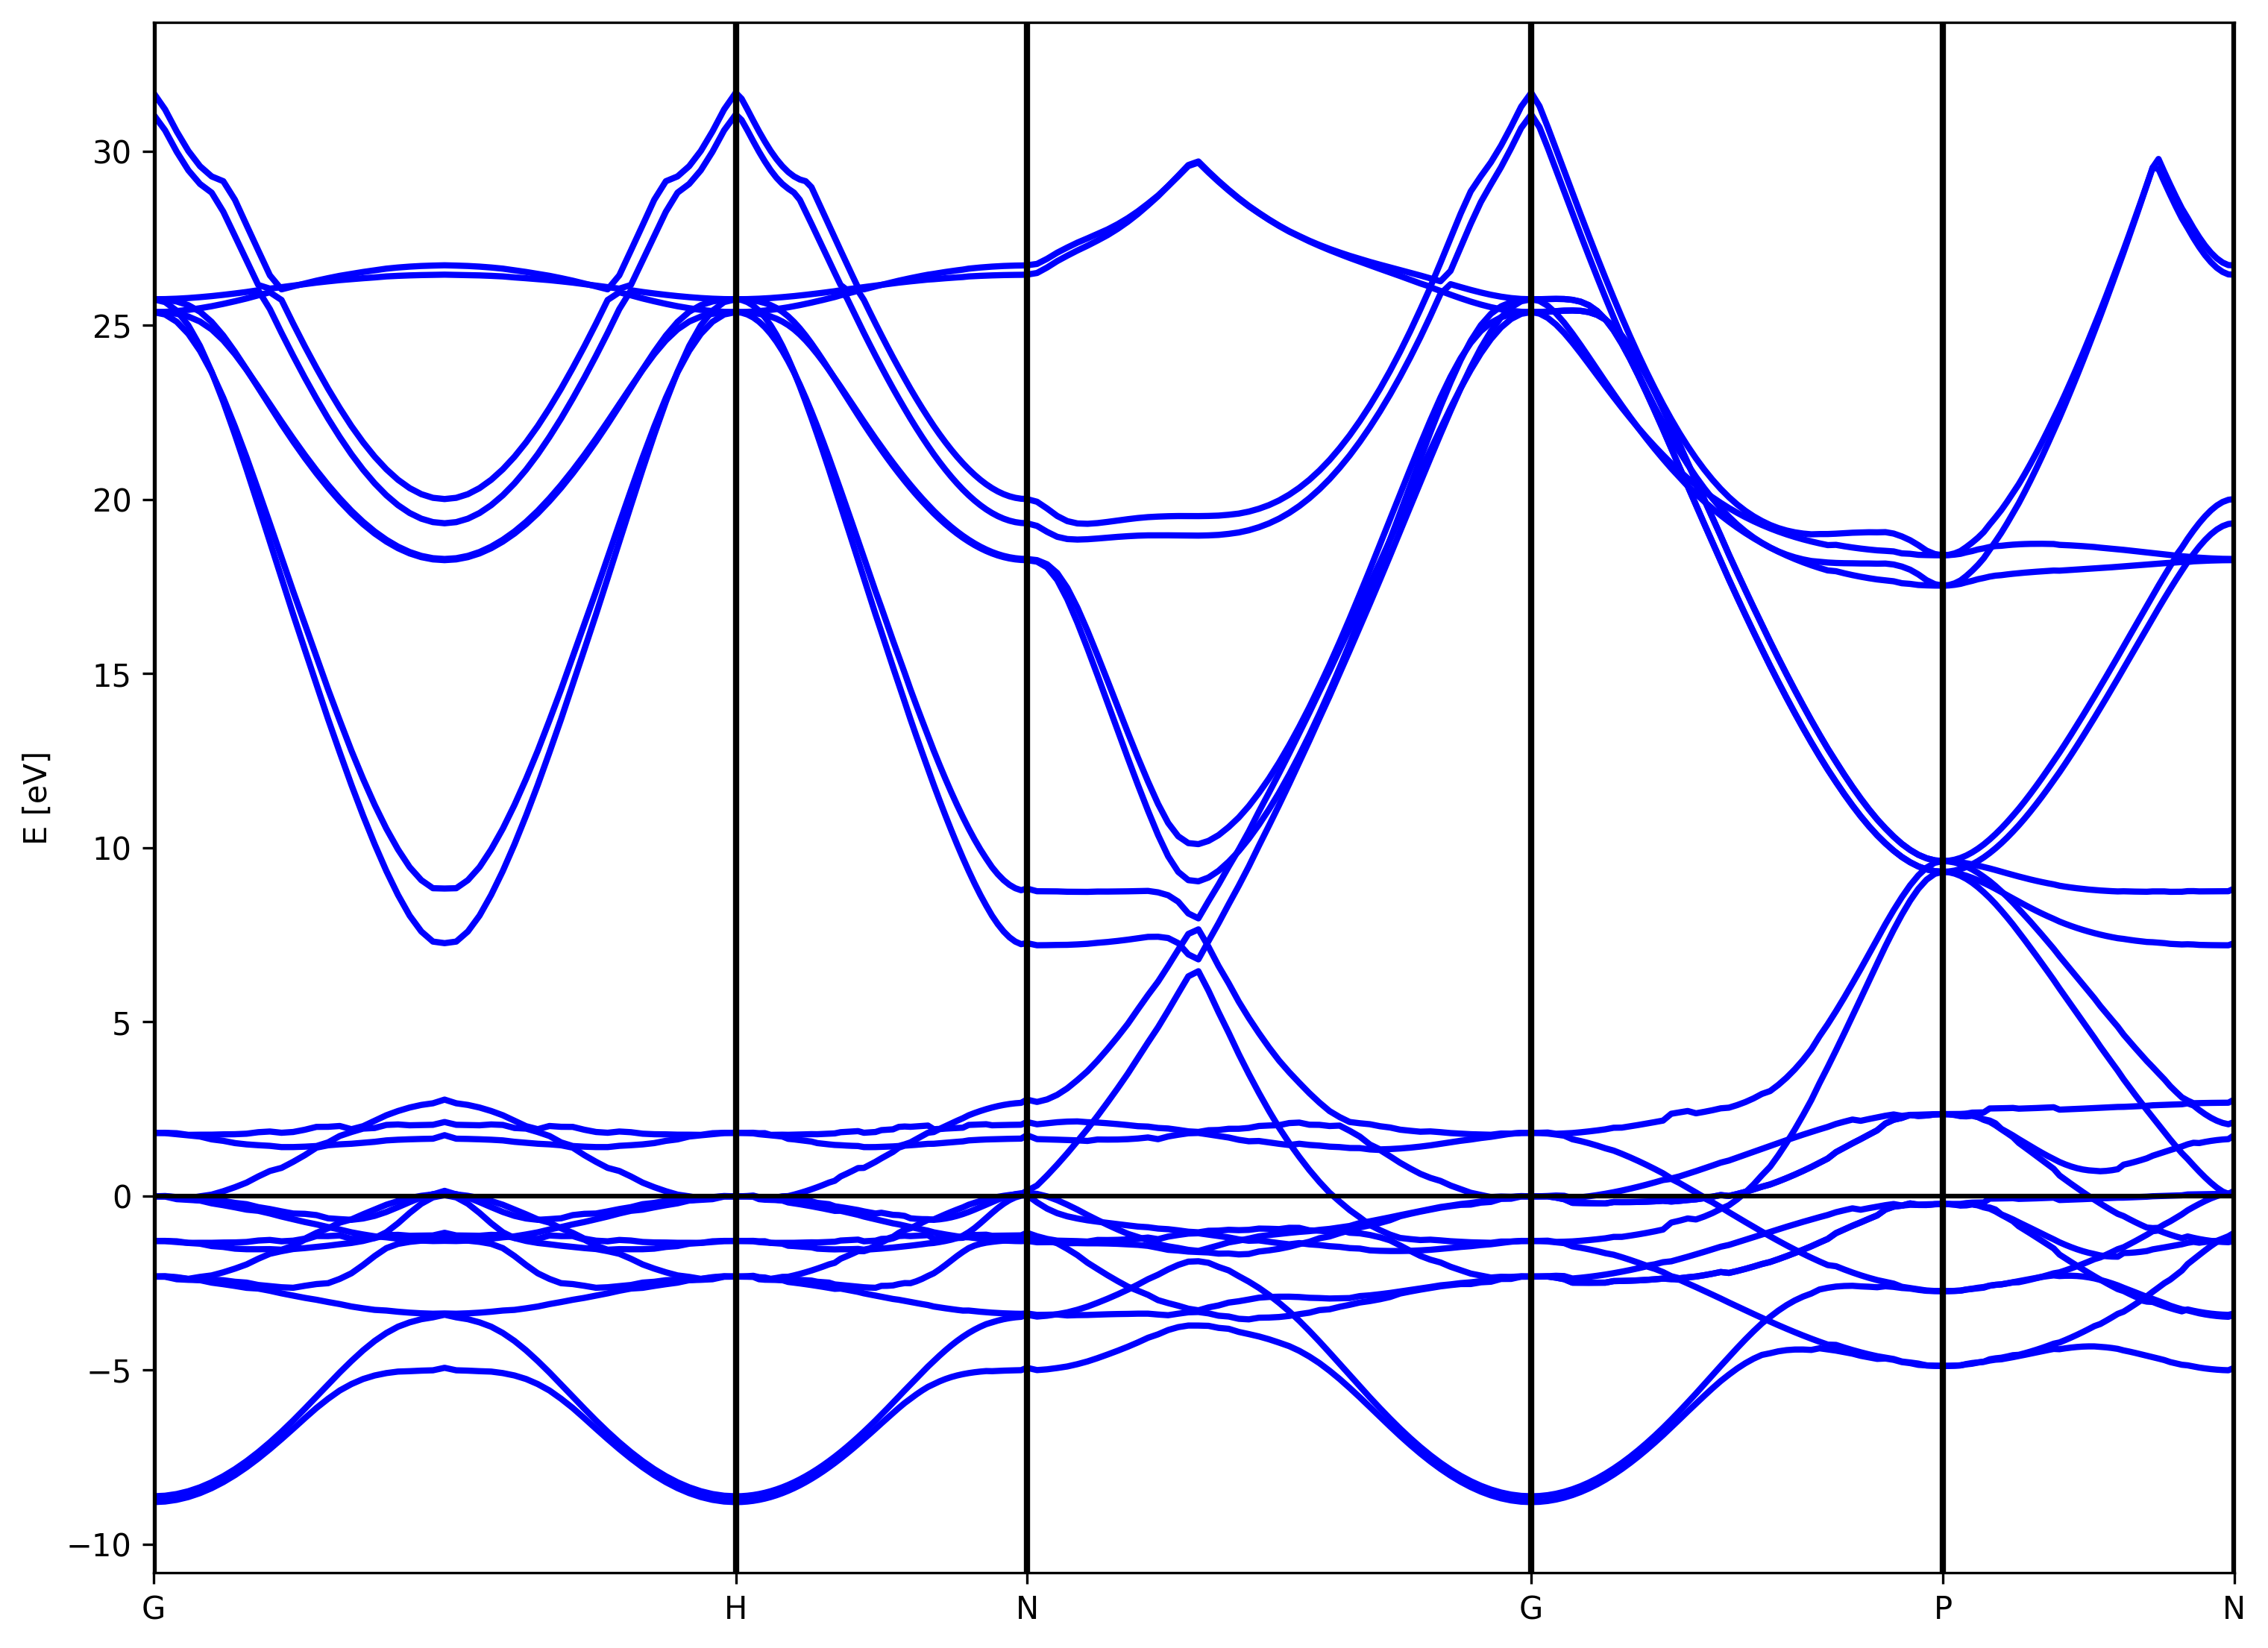

In [20]:
# get a pyplot figure
fig,ax = plt.subplots(figsize=(12,9), dpi=300)
path_kpoints = p.get_indexes()
# ticks and labels for the band structure according ot Path defined above
path_ticks, path_labels = list(zip(*path_kpoints))
ax.set_xticks( path_ticks )
ax.set_xticklabels( path_labels )
ax.set_ylabel('E [eV]')

#get kpoint_dists 
kpoints_dists = calculate_distances(xml_obj.kpoints)
ticks, labels = list(zip(*path_kpoints))
ax.set_xticks([kpoints_dists[t] for t in ticks])
ax.set_xticklabels(labels)
ax.set_xlim(kpoints_dists[0],kpoints_dists[-1])

#plot vertical lines
for t in ticks:
    ax.axvline(kpoints_dists[t],c='k',lw=2)
ax.axhline(0,c='k')

#plot bands
eigen1 = np.array(xml_obj.eigen1)

for ib in range(xml_obj.nbands):
    ax.plot(kpoints_dists,eigen1[:,ib], color='blue',linestyle='-' , lw=2, zorder =1)
